In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 读取泰坦尼克号数据集
df = pd.read_csv('../train.csv')

# 简单的数据预处理
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 选择特征和标签
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 随机森林模型训练
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 预测与评估
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {acc:.4f}')

Random Forest Accuracy: 0.8268


C:\Users\86178\AppData\Local\Temp/ipykernel_31084/3268345004.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\86178\AppData\Local\Temp/ipykernel_31084/3268345004.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

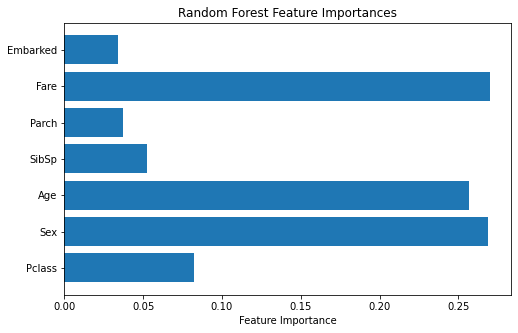

In [3]:
# 查看特征重要性
import matplotlib.pyplot as plt

importances = clf.feature_importances_
feature_names = features

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

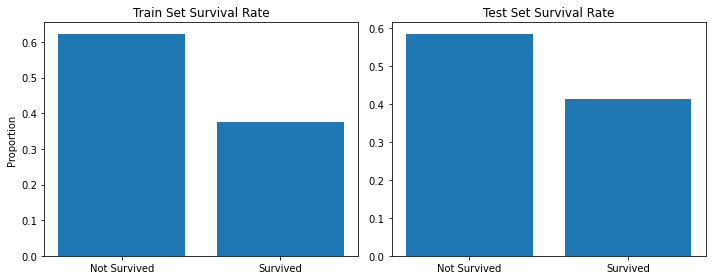

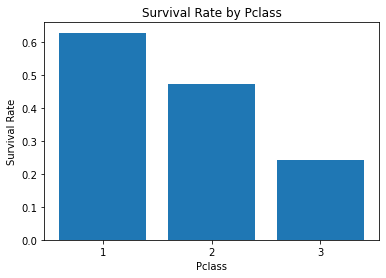

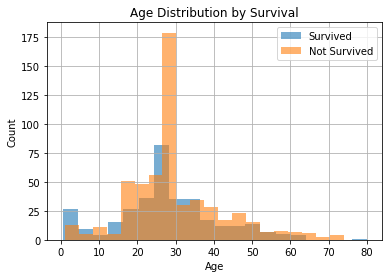

In [4]:
# 画训练集和测试集的幸存比例柱状图
train_survived = y_train.value_counts(normalize=True)
test_survived = y_test.value_counts(normalize=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].bar(['Not Survived', 'Survived'], train_survived.sort_index())
axes[0].set_title('Train Set Survival Rate')
axes[0].set_ylabel('Proportion')

axes[1].bar(['Not Survived', 'Survived'], test_survived.sort_index())
axes[1].set_title('Test Set Survival Rate')

plt.tight_layout()
plt.show()

# 画不同舱位(Pclass)的幸存率
pclass_survival = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 4))
plt.bar(pclass_survival.index.astype(str), pclass_survival.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()

# 画年龄分布直方图
plt.figure(figsize=(6, 4))
df[df['Survived'] == 1]['Age'].hist(alpha=0.6, bins=20, label='Survived')
df[df['Survived'] == 0]['Age'].hist(alpha=0.6, bins=20, label='Not Survived')
plt.xlabel('Age')

plt.ylabel('Count')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

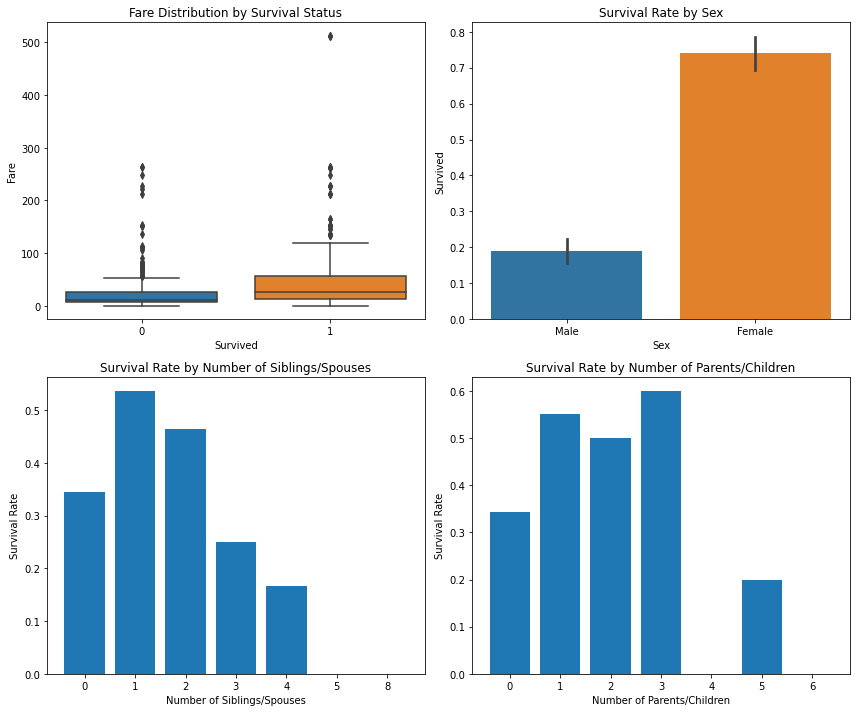

In [7]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Fare distribution by survival
sns.boxplot(data=df, x='Survived', y='Fare', ax=axes[0,0])
axes[0,0].set_title('Fare Distribution by Survival Status')

# Plot 2: Sex vs Survival
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Sex')
axes[0,1].set_xticklabels(['Male', 'Female'])

# Plot 3: SibSp vs Survival Rate
sibsp_survival = df.groupby('SibSp')['Survived'].mean()
axes[1,0].bar(sibsp_survival.index.astype(str), sibsp_survival.values)
axes[1,0].set_title('Survival Rate by Number of Siblings/Spouses')
axes[1,0].set_xlabel('Number of Siblings/Spouses')
axes[1,0].set_ylabel('Survival Rate')

# Plot 4: Parch vs Survival Rate
parch_survival = df.groupby('Parch')['Survived'].mean()
axes[1,1].bar(parch_survival.index.astype(str), parch_survival.values)
axes[1,1].set_title('Survival Rate by Number of Parents/Children')
axes[1,1].set_xlabel('Number of Parents/Children')
axes[1,1].set_ylabel('Survival Rate')


plt.tight_layout()
plt.show()